In [5]:
import pandas as pd

#GOAL: determine the performance of the students for all the tests

student_dataset = pd.read_csv('student_marks.csv')
student_dataset.head(10)

,Student_ID,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12
0,22000,78,87,91,91,88,98,94,100,100,100,100,93
1,22001,79,71,81,72,73,68,59,69,59,60,61,67
2,22002,66,65,70,74,78,86,87,96,88,82,90,86
3,22003,60,58,54,61,54,57,64,62,72,63,72,76
4,22004,99,95,96,93,97,89,92,98,91,98,95,88
5,22005,41,36,35,28,35,36,27,26,19,22,27,31
6,22006,47,50,47,57,62,64,71,75,85,87,85,89
7,22007,84,74,70,68,58,59,56,56,64,70,67,59
8,22008,74,64,58,57,53,51,47,45,42,43,34,24
9,22009,87,81,73,74,71,63,53,45,39,43,46,38


In [4]:
#check whether there are null entries in any of the columns
student_dataset.isnull().sum()

Student_ID    0
Test_1        0
Test_2        0
Test_3        0
Test_4        0
Test_5        0
Test_6        0
Test_7        0
Test_8        0
Test_9        0
Test_10       0
Test_11       0
Test_12       0
dtype: int64

In [7]:
#normaize the marks using different normalization techniques
#Z-SCORE
student_dataset["Test_1_2"] = (student_dataset["Test_1"] - student_dataset["Test_1"].mean()/student_dataset["Test_1"].std())
student_dataset["Test_1_2"].head(10)

0    73.840524
1    74.840524
2    61.840524
3    55.840524
4    94.840524
5    36.840524
6    42.840524
7    79.840524
8    69.840524
9    82.840524
Name: Test_1_2, dtype: float64

In [10]:
#SIMPLE FEATURE SCALING
df_SFC = student_dataset["Test_1"]/student_dataset["Test_1"].max()
df_SFC.head(10)

0    0.78
1    0.79
2    0.66
3    0.60
4    0.99
5    0.41
6    0.47
7    0.84
8    0.74
9    0.87
Name: Test_1, dtype: float64

In [9]:
#MIN-MAX
df_minmax = (student_dataset["Test_1"] - student_dataset["Test_1"].min()) / (student_dataset["Test_1"].max()-student_dataset["Test_1"].min())
df_minmax.head(10)

0    0.633333
1    0.650000
2    0.433333
3    0.333333
4    0.983333
5    0.016667
6    0.116667
7    0.733333
8    0.566667
9    0.783333
Name: Test_1, dtype: float64

In [39]:
#conducting binning on the datasets to group the marks

import numpy as np

bins = np.linspace(student_dataset["Test_1"].min() , student_dataset["Test_1"].max(),4)
bins
group_names = ["Low", "Medium", "High"]

student_dataset["Test_1_binned"] = pd.cut(student_dataset["Test_1"], bins, labels=group_names, include_lowest = True)
#student_dataset.drop(["level_0","index"], axis=1,inplace=True)
student_dataset.head()

,Student_ID,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12,Test_1_binned
0,22000,78,87,91,91,88,98,94,100,100,100,100,93,Medium
1,22001,79,71,81,72,73,68,59,69,59,60,61,67,Medium
2,22002,66,65,70,74,78,86,87,96,88,82,90,86,Medium
3,22003,60,58,54,61,54,57,64,62,72,63,72,76,Low
4,22004,99,95,96,93,97,89,92,98,91,98,95,88,High


In [53]:
print(student_dataset.loc[0,'Test_1':'Test_12'])

Test_1      78
Test_2      87
Test_3      91
Test_4      91
Test_5      88
Test_6      98
Test_7      94
Test_8     100
Test_9     100
Test_10    100
Test_11    100
Test_12     93
Name: 0, dtype: object


In [67]:
#upon seeing the data,to see the performance on each student according to the binning we need to average each row

#create an empty list for the averages
avg_list = []
#loop through each row of the student_dataset
for i in student_dataset.index:
    avg = student_dataset.loc[i,'Test_1':'Test_12'].mean()
    avg_list.append(avg)
    
#print(avg_list)
#create a series out of the average list
avg_s = pd.Series(avg_list)
student_dataset = student_dataset.assign(average_mark = avg_s)
student_dataset.head(3)

,Student_ID,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12,Test_1_binned,average_mark
0,22000,78,87,91,91,88,98,94,100,100,100,100,93,Medium,93.333333
1,22001,79,71,81,72,73,68,59,69,59,60,61,67,Medium,68.250000
2,22002,66,65,70,74,78,86,87,96,88,82,90,86,Medium,80.666667


In [69]:
#bin the average for each of the students to get a measurement of each students overall performance
avg_bins = np.linspace(student_dataset["average_mark"].min(),student_dataset["average_mark"].max(),4)
student_dataset['Average_Performance_Weight'] = pd.cut(student_dataset["average_mark"],avg_bins,labels=group_names, include_lowest = True)
student_dataset.head(5)

,Student_ID,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12,Test_1_binned,average_mark,Average_Performance_Weight
0,22000,78,87,91,91,88,98,94,100,100,100,100,93,Medium,93.333333,High
1,22001,79,71,81,72,73,68,59,69,59,60,61,67,Medium,68.250000,Medium
2,22002,66,65,70,74,78,86,87,96,88,82,90,86,Medium,80.666667,High
3,22003,60,58,54,61,54,57,64,62,72,63,72,76,Low,62.750000,Medium
4,22004,99,95,96,93,97,89,92,98,91,98,95,88,High,94.250000,High


In [70]:
student_dataset.drop(["Test_1_binned"], axis=1,inplace=True)

In [111]:
student_dataset.head(10)

,Student_ID,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12,average_mark,Average_Performance_Weight
0,22000,78,87,91,91,88,98,94,100,100,100,100,93,93.333333,High
1,22001,79,71,81,72,73,68,59,69,59,60,61,67,68.250000,Medium
2,22002,66,65,70,74,78,86,87,96,88,82,90,86,80.666667,High
3,22003,60,58,54,61,54,57,64,62,72,63,72,76,62.750000,Medium
4,22004,99,95,96,93,97,89,92,98,91,98,95,88,94.250000,High
5,22005,41,36,35,28,35,36,27,26,19,22,27,31,30.250000,Low
6,22006,47,50,47,57,62,64,71,75,85,87,85,89,68.250000,Medium
7,22007,84,74,70,68,58,59,56,56,64,70,67,59,65.416667,Medium
8,22008,74,64,58,57,53,51,47,45,42,43,34,24,49.333333,Low
9,22009,87,81,73,74,71,63,53,45,39,43,46,38,59.416667,Medium


Text(0.5, 1.0, 'Average student mark details')

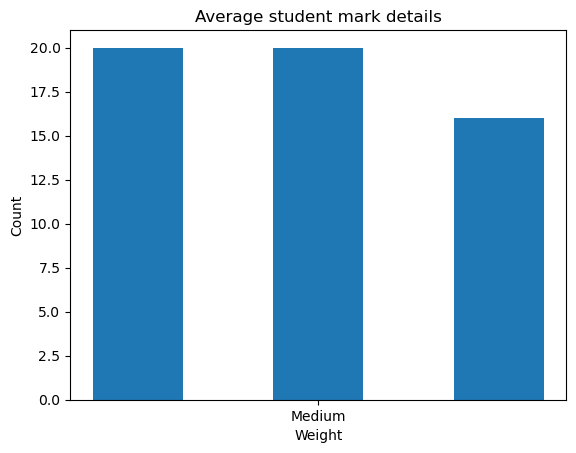

In [85]:
#create a bar graph to visualize the performance of all the tests
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(student_dataset['Average_Performance_Weight'], bins = 3, rwidth=0.5)

plt.pyplot.xlabel("Weight")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Average student mark details")

Text(0.5, 1.0, 'The performace for all 12 tests that had a low average')

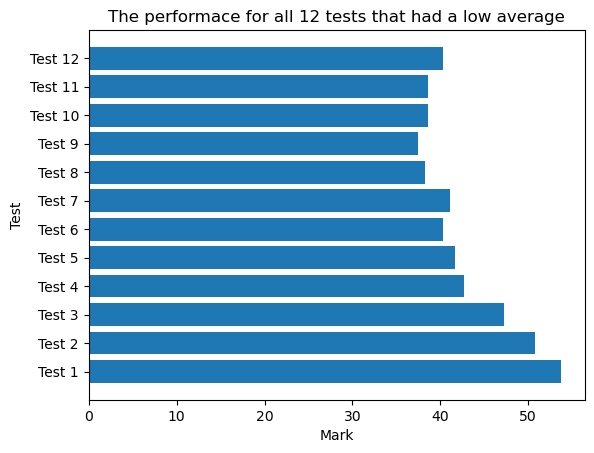

In [110]:
#select the students with the lowest average
low_df = student_dataset.loc[student_dataset["Average_Performance_Weight"] =="Low"]
#find out which test they struggled with the most 
y = ["Test 1","Test 2","Test 3","Test 4","Test 5","Test 6","Test 7","Test 8","Test 9","Test 10","Test 11","Test 12"]
#get the value of the highest marks from each column to make them into a series
highest_marks_series = pd.Series(low_df.loc[:,"Test_1":"Test_12"].mean())
plt.pyplot.barh(y,highest_marks_series)

plt.pyplot.xlabel("Mark")
plt.pyplot.ylabel("Test")
plt.pyplot.title("The performace for all 12 tests that had a low average")

<Axes: >

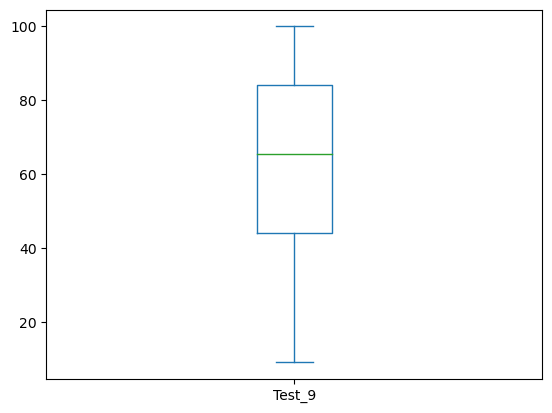

In [172]:
#as we have determined that test 9 was the one with the lowest marks, break down the performance of the 9th test
#use a boxplot to determine the rage of the students performance and look out for any outliers
student_dataset['Test_9'].plot.box()

<Axes: ylabel='Count'>

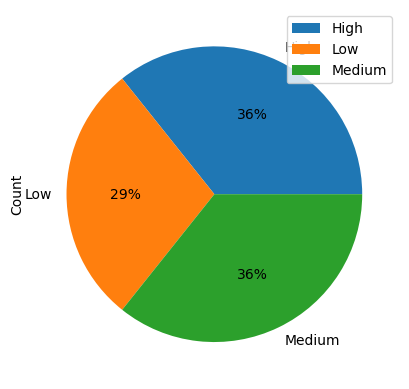

In [157]:
#use a pie chart to determine the percentage of students with medium and low scores in coplarison to the high achievers
#this is being done to assure that indeed the medium performance is equivalent to the low
#get the sum of each of the instances
sum_low = len(student_dataset.loc[student_dataset['Average_Performance_Weight']=="Low"])
sum_average = len(student_dataset.loc[student_dataset['Average_Performance_Weight']=="Medium"])
sum_high = len(student_dataset.loc[student_dataset['Average_Performance_Weight']=="High"])

#create new df
df = pd.DataFrame({'Performance':['Low', 'Medium','High'],
                 'Count':[sum_low,sum_average,sum_high]})
df.groupby(['Performance']).sum().plot(kind='pie', y='Count',autopct='%1.0f%%')
#results show that less than 30% of the students performed exceptionally well
#70% of the students scored low to average marks indicating that the school might need to improve their curriculum to maximize
#their performance

In [194]:
from flask import Flask
from matplotlib.figure import Figure
import numpy as np
import base64
from io import BytesIO

#create an instance of the Flask class
#It runs the WSGI (web server gateway interface) server that runs your app
app = Flask(__name__)
@app.route("/")


#create method to display the dashboard with all the charts 
def dashboard():
    
    #generate pie chart
    #get the sum of each of the instances
    sum_low = len(student_dataset.loc[student_dataset['Average_Performance_Weight']=="Low"])
    sum_average = len(student_dataset.loc[student_dataset['Average_Performance_Weight']=="Medium"])
    sum_high = len(student_dataset.loc[student_dataset['Average_Performance_Weight']=="High"])

    df = pd.DataFrame({'Performance':['Low', 'Medium','High'],
                 'Count':[sum_low,sum_average,sum_high]})

    fig, ax = plt.subplots()
    ax.pie(df['Count'], labels = df['Performance'],autopct='%1.0f%%')
    ax.set_title("Percentage of Averages of Low, Medium and High")
    pie_buf = BytesIO()
    #save the pie chart as png in the file
    plt.savefig('score_piechart.png')
    pie_data = base64.b64encode(pie_buf.getbuffer()).decode("ascii")

    #generate horizontal bar chart
    plt.pyplot.hist(student_dataset['Average_Performance_Weight'], bins = 3, rwidth=0.5)
    plt.savefig('marks_histogram.png')
    plt.pyplot.xlabel("Weight")
    plt.pyplot.ylabel("Count")
    plt.pyplot.title("Average student mark details")
    hor_buf = BytesIO()
    hor_data = base64.b64encode(hor_buf.getbuffer()).decode("ascii")

    #use a boxplot to determine the rage of the students performance and look out for any outliers
    student_dataset['Test_9'].plot.box()
    plt.savefig('testPerformance_boxplot.png')
    box_buf = BytesIO()
    box_data = base64.b64encode(box_buf.getbuffer()).decode("ascii")

    return f"""<img src="data:image/png;base64,{pie_data}" />
           <img src="data:image/png;base64,{hor_data}" />
           <img src="data:image/png;base64,{box_data}" />"""


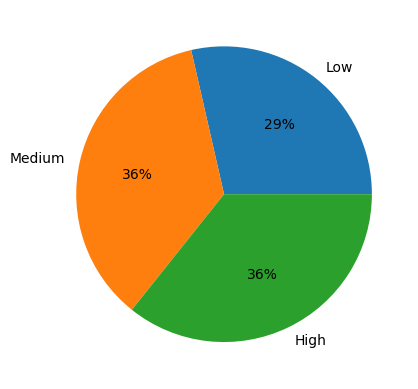

In [161]:
#use a pie chart to determine the percentage of students with medium and low scores in coplarison to the high achievers
import matplotlib.pyplot as plt

#get the sum of each of the instances
sum_low = len(student_dataset.loc[student_dataset['Average_Performance_Weight']=="Low"])
sum_average = len(student_dataset.loc[student_dataset['Average_Performance_Weight']=="Medium"])
sum_high = len(student_dataset.loc[student_dataset['Average_Performance_Weight']=="High"])

df = pd.DataFrame({'Performance':['Low', 'Medium','High'],
                 'Count':[sum_low,sum_average,sum_high]})

fig, ax = plt.subplots()
ax.pie(df['Count'], labels = df['Performance'],autopct='%1.0f%%')
#save the pie chart as png in the file
plt.savefig('score_piechart.png')

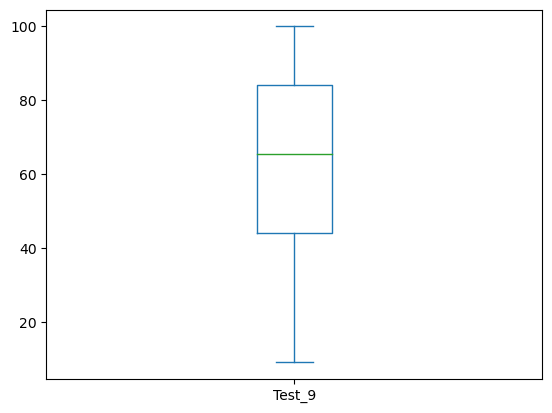

In [189]:

#use a boxplot to determine the rage of the students performance and look out for any outliers
student_dataset['Test_9'].plot.box()
plt.savefig('testPerformance_boxplot.png')